In [9]:
import pandas as pd
import pandas as pd  # For data handling
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from textwrap import wrap
import matplotlib.pyplot as plt
from textblob import TextBlob
import numpy as np
import seaborn as sns


In [19]:
sns.color_palette('icefire')
sns.set_palette('icefire')


In [10]:
restaurants = pd.read_csv('./cleaned_revs.csv')
restaurants.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
restaurants.head()

,review_id,user_id,business_id,stars,text,name,city,biz_stars,biz_review_count,categories,average_stars,cleaned,lemmatized
0,lDoxqlDKb4H7zpI_zJ01aA,Ye-9S8f2dt41UBfy4lXffA,W4ZEKkva9HpAdZG88juwyQ,2,The French bread is crusty an warm but... Ice ...,Mr. B's Bistro,New Orleans,4.0,2064,"Bars, Breakfast & Brunch, Restaurants, Barbequ...",3.98,the french bread is crusty an warm but ice col...,french bread crusty warm ice cold butter serio...
1,uNnqb1qJxUDS4qrM_mZxtA,Ye-9S8f2dt41UBfy4lXffA,PzhPMkaNYiKDTHoTG0r8rw,5,Do I love this place? Pho sure! Phó Cam Ly is ...,Pho Cam Ly,New Orleans,4.5,178,"Vietnamese, Restaurants",3.98,do i love this place pho sure pho cam ly is a ...,love pho sure pho cam ly great vietnamese neig...
2,cA-WwCC7OFF6CreyTC_l2w,Ye-9S8f2dt41UBfy4lXffA,GBTPC53ZrG1ZBY3DT8Mbcw,5,"We had the coffee, grillade & grits ($15) and ...",Luke,New Orleans,4.0,4554,"German, Restaurants, Seafood, Cocktail Bars, F...",3.98,we had the coffee grillade grits and shrimp gr...,coffee grillade grit shrimp grit plus add crab...
3,lJpQrjnwqe9U3epf09FjcQ,Ye-9S8f2dt41UBfy4lXffA,GBTPC53ZrG1ZBY3DT8Mbcw,2,Lüke Restaurant is consistent with their food:...,Luke,New Orleans,4.0,4554,"German, Restaurants, Seafood, Cocktail Bars, F...",3.98,luke restaurant is consistent with their food ...,luke consistent fresh prepare request correct ...
4,F1Q-Jh0r42iJ5OFy5QKMBA,Ye-9S8f2dt41UBfy4lXffA,OINbC0rpDVJ5bfxt3LO9fw,5,If you go during buffet time and get anything ...,Li'l Dizzy's Cafe,New Orleans,4.5,651,"Restaurants, Cajun/Creole",3.98,if you go during buffet time and get anything ...,buffet time buffet miss good opportunity true ...


In [12]:
biz_dict = {}

for row in restaurants.itertuples():
    biz_dict[row.business_id] = row.name

In [13]:
df_grouped=restaurants[['business_id','lemmatized']].astype(str).groupby(by='business_id')['lemmatized'].apply(' '.join).reset_index()
df_grouped.head()

,business_id,lemmatized
0,-If0ps0QhOLCYVWQWs9RYg,bread good couple excellent sandwich lunch fan...
1,-Tskf8WK17rb3ZfeFuRSWA,peter planter punch fabulous citrus y refresh ...
2,-VlBFlHwX-Pt6Xyzs9roGw,eat lundi gras parade limit menu pleasantly su...
3,-fJPJP7iOd1ukDNqTSINIg,cool neighborhood cafe get busy brunch lunch b...
4,-psZLTe6IJTQUB-bZF7Zyg,stop time past wednesday pretty crowded arrive...


In [14]:
cv = CountVectorizer(analyzer='word', min_df=100)
data = cv.fit_transform(df_grouped['lemmatized'].T)
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names_out())
df_dtm = df_dtm.drop(['good', 'like', 'order', 'food', 'not'], axis=1)
df_dtm.head(10)

,able,absolute,absolutely,accommodate,accompany,actual,actually,add,addition,additional,...,ya,yeah,year,yelp,yelper,yes,yesterday,young,yum,yummy
0,2,0,1,0,0,1,1,1,0,0,...,0,2,1,2,0,3,0,2,0,0
1,3,1,4,3,0,0,7,1,1,0,...,0,3,11,1,0,2,2,0,0,3
2,9,0,7,5,2,1,9,7,7,1,...,0,4,6,4,1,5,0,1,3,3
3,1,0,0,0,0,0,0,0,0,0,...,1,1,2,2,0,3,0,0,0,0
4,1,0,2,1,0,3,6,5,0,0,...,1,3,1,1,0,3,0,1,0,0
5,3,0,3,0,1,0,6,12,2,1,...,1,1,4,1,1,1,3,1,2,3
6,0,0,4,2,2,0,2,1,1,0,...,0,1,7,3,0,1,0,0,0,0
7,0,0,0,0,0,0,2,6,0,0,...,0,0,5,1,0,3,1,0,2,1
8,2,0,3,1,1,1,2,6,0,0,...,1,0,3,3,1,1,0,1,3,0
9,1,1,1,0,0,1,2,2,0,0,...,0,0,4,0,1,0,0,0,0,0


In [ ]:
## Sets the index of the document term matrix as the business id 
df_dtm.index=df_grouped['business_id']

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

  return wc 
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  cloud = generate_wordcloud(df_dtm[product].sort_values(ascending=False),biz_dict[product]) 
  cloud.to_file('biz{}.png'.format(index)) 
  if index == 10:
    break

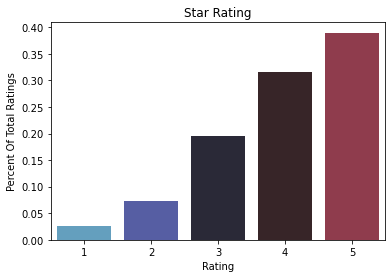

In [21]:
star_counts = list(restaurants['stars'].value_counts()/len(restaurants))

sns.barplot(x=[5,4,3,2,1], y = star_counts)
plt.title('Star Rating')
plt.ylabel('Percent Of Total Ratings')
plt.xlabel('Rating')

plt.savefig('star_rating.png',pad_inches=0.1,
        facecolor='white')

In [22]:
avg_rev_len = restaurants['text'].apply(len).mean()
print(avg_rev_len)

843.8570551205282


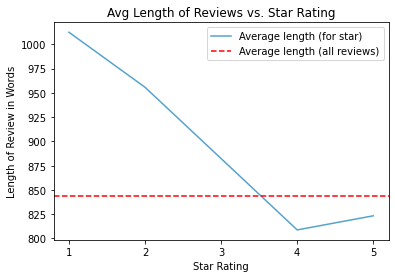

In [23]:
avg_len = []
for rating in np.arange(1,6):
    star = restaurants.loc[restaurants['stars'] == rating]
    avg_len.append(star['text'].apply(len).mean())

x = np.arange(1,6)
plt.plot(x, avg_len, label = 'Average length (for star)')
plt.xticks([1,2,3,4,5], x)
plt.axhline(y=avg_rev_len, linestyle = '--', color='r', label='Average length (all reviews)')
plt.title('Avg Length of Reviews vs. Star Rating')
plt.ylabel('Length of Review in Words')
plt.xlabel('Star Rating')
plt.legend()
#plt.show()

plt.savefig('rev_len.png', pad_inches=0.1,
        facecolor='white')